In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
df = pd.read_csv('Data/MarketBasket/market_basket.csv')
df.head()

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,1,02/01/2016,2547,1,X52,0EM7L,1.0,3.13
1,2,02/01/2016,822,2,2ML,68BRQ,1.0,5.46
2,3,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35
3,4,02/01/2016,3719,4,0H2,549KK,1.0,5.59
4,5,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88


In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131706 entries, 0 to 131705
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Date            131706 non-null  object 
 1   Customer_ID     131706 non-null  int64  
 2   Transaction_ID  131706 non-null  int64  
 3   SKU_Category    131706 non-null  object 
 4   SKU             131706 non-null  object 
 5   Quantity        131706 non-null  float64
 6   Sales_Amount    131706 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 7.0+ MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_ID,131706.0,12386.450367,6086.447552,1.00,7349.00,13496.00,17306.00,22625.00
Transaction_ID,131706.0,32389.604187,18709.901238,1.00,16134.00,32620.00,48548.00,64682.00
Quantity,131706.0,1.485311,3.872667,0.01,1.00,1.00,1.00,400.00
Sales_Amount,131706.0,11.981524,19.359699,0.02,4.23,6.92,12.33,707.73


In [8]:
df.describe(include=['O']).T

,count,unique,top,freq
Date,131706,363,23/09/2016,638
SKU_Category,131706,187,N8U,10913
SKU,131706,5242,UNJKW,2007


In [7]:
df.isnull().sum()

Date              0
Customer_ID       0
Transaction_ID    0
SKU_Category      0
SKU               0
Quantity          0
Sales_Amount      0
dtype: int64

In [9]:
df['Date']= pd.to_datetime(df['Date'])

C:\Users\khoin\AppData\Local\Temp\ipykernel_31088\2691600196.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date']= pd.to_datetime(df['Date'])


In [10]:
df.head()

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,2016-02-01,2547,1,X52,0EM7L,1.0,3.13
1,2016-02-01,822,2,2ML,68BRQ,1.0,5.46
2,2016-02-01,3686,3,0H2,CZUZX,1.0,6.35
3,2016-02-01,3719,4,0H2,549KK,1.0,5.59
4,2016-02-01,9200,5,0H2,K8EHH,1.0,6.88


In [22]:
TransCount = df.groupby(['Transaction_ID'])['SKU'].count().sort_values(ascending=True)

dict_transCount = {}

for i in TransCount.unique():
    dict_transCount[i] = 0
    
for j in TransCount:
    dict_transCount[j] = dict_transCount[j] + 1

dict_transCount

{1: 32906,
 2: 16845,
 3: 6802,
 4: 3478,
 5: 1851,
 6: 1036,
 7: 646,
 8: 426,
 9: 254,
 10: 167,
 11: 94,
 12: 64,
 13: 52,
 14: 23,
 15: 16,
 16: 4,
 17: 6,
 18: 4,
 19: 5,
 20: 1,
 21: 2}

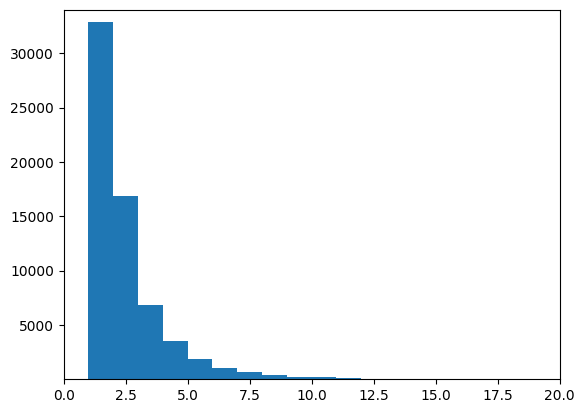

In [11]:
fig, ax = plt.subplots()
ax.hist(TransCount, bins=20)
ax.set(xlim=(0,20),
      ylim=(1,34000))
plt.show()

In [12]:
dfilter = df.groupby(['SKU'])['Quantity'].sum().reset_index(name='Quantity')
dfilter = dfilter[dfilter['Quantity'] > 10]
dfilter

,SKU,Quantity
1,00OK1,18.0
2,0121I,31.0
3,01IEO,43.0
6,01V7M,45.0
9,03C6L,36.0
...,...,...
5230,ZVTO4,236.0
5231,ZWFSY,862.0
5233,ZWWB5,11.0
5236,ZYF2U,14.0


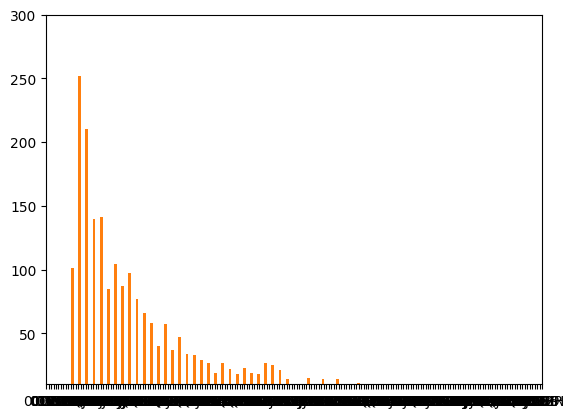

In [13]:
fig, ax = plt.subplots()
ax.hist(dfilter, bins=2000, linewidth=0.1)
ax.set(xlim=(0,200),
      ylim=(10,300))
plt.show()

In [14]:
basket = (df.groupby(['Customer_ID', 'SKU'])['Quantity']
         .sum().unstack().reset_index().fillna(0)
         .set_index('Customer_ID'))
basket

SKU,00GVC,00OK1,0121I,01IEO,01IQT,01L05,01V7M,01XVY,029WA,03C6L,...,ZWNCK,ZWWB5,ZX2UM,ZY9N9,ZYF2U,ZZ2AO,ZZDW7,ZZM1A,ZZNC5,ZZX6K
Customer_ID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22623,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
def encode_units(x):
    if x <= 0:
        return False
    if x >= 1:
        return True
    else: 
        return False

In [16]:
df = basket.applymap(encode_units)
df

SKU,00GVC,00OK1,0121I,01IEO,01IQT,01L05,01V7M,01XVY,029WA,03C6L,...,ZWNCK,ZWWB5,ZX2UM,ZY9N9,ZYF2U,ZZ2AO,ZZDW7,ZZM1A,ZZNC5,ZZX6K
Customer_ID,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22621,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
22622,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
22623,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
df_itemset = apriori(df, min_support=0.002, use_colnames=True)
df_itemset

,support,itemsets
0,0.002122,(096VW)
1,0.003006,(09LL9)
2,0.002873,(0AEJH)
3,0.002387,(0B8JX)
4,0.002740,(0D3EZ)
...,...,...
583,0.004773,"(M6J9W, UNJKW)"
584,0.004155,"(OV1P9, UNJKW)"
585,0.002298,"(TL4WZ, UNJKW)"
586,0.002740,"(UQC6F, UNJKW)"


In [18]:
rules = association_rules(df_itemset, metric="lift", min_threshold=1.4)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(6V2Q8),(3483Q),0.005613,0.006144,0.002033,0.362205,58.955985,0.001999,1.558269
1,(3483Q),(6V2Q8),0.006144,0.005613,0.002033,0.330935,58.955985,0.001999,1.486234
2,(5O2CO),(3QNEE),0.002785,0.003624,0.002166,0.777778,214.600271,0.002156,4.483691
3,(3QNEE),(5O2CO),0.003624,0.002785,0.002166,0.597561,214.600271,0.002156,2.477929
4,(3SZO0),(UNJKW),0.014453,0.072840,0.002431,0.168196,2.309119,0.001378,1.114637


In [19]:
rules.sort_values(by='support', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
53,(UNJKW),(COWU2),0.072840,0.030099,0.006630,0.091019,3.023956,0.004437,1.067020
52,(COWU2),(UNJKW),0.030099,0.072840,0.006630,0.220264,3.023956,0.004437,1.189070
79,(UNJKW),(M6J9W),0.072840,0.025812,0.004773,0.065534,2.538881,0.002893,1.042508
78,(M6J9W),(UNJKW),0.025812,0.072840,0.004773,0.184932,2.538881,0.002893,1.137524
81,(UNJKW),(OV1P9),0.072840,0.027094,0.004155,0.057039,2.105226,0.002181,1.031756
...,...,...,...,...,...,...,...,...,...
33,(9Y7M0),(LJ26I),0.008309,0.008309,0.002033,0.244681,29.446299,0.001964,1.312942
1,(3483Q),(6V2Q8),0.006144,0.005613,0.002033,0.330935,58.955985,0.001999,1.486234
41,(C6TXL),(B87MU),0.020818,0.008619,0.002033,0.097665,11.331591,0.001854,1.098684
40,(B87MU),(C6TXL),0.008619,0.020818,0.002033,0.235897,11.331591,0.001854,1.281480


In [20]:
for row in rules.iterrows():
     if "UNJKW" in row[1][0]:
             print(row)

(5, antecedents            (UNJKW)
consequents            (3SZO0)
antecedent support     0.07284
consequent support    0.014453
support               0.002431
confidence            0.033374
lift                  2.309119
leverage              0.001378
conviction            1.019574
Name: 5, dtype: object)
(11, antecedents            (UNJKW)
consequents            (4X8P4)
antecedent support     0.07284
consequent support    0.017193
support               0.002387
confidence            0.032767
lift                  1.905792
leverage              0.001134
conviction            1.016101
Name: 11, dtype: object)
(15, antecedents            (UNJKW)
consequents            (51OBI)
antecedent support     0.07284
consequent support    0.016044
support               0.003182
confidence            0.043689
lift                   2.72306
leverage              0.002014
conviction            1.028908
Name: 15, dtype: object)
(19, antecedents            (UNJKW)
consequents            (536VK)
antecede

In [21]:
support=rules['support'].values
confidence=rules['confidence'].values
lift = rules['lift'].values

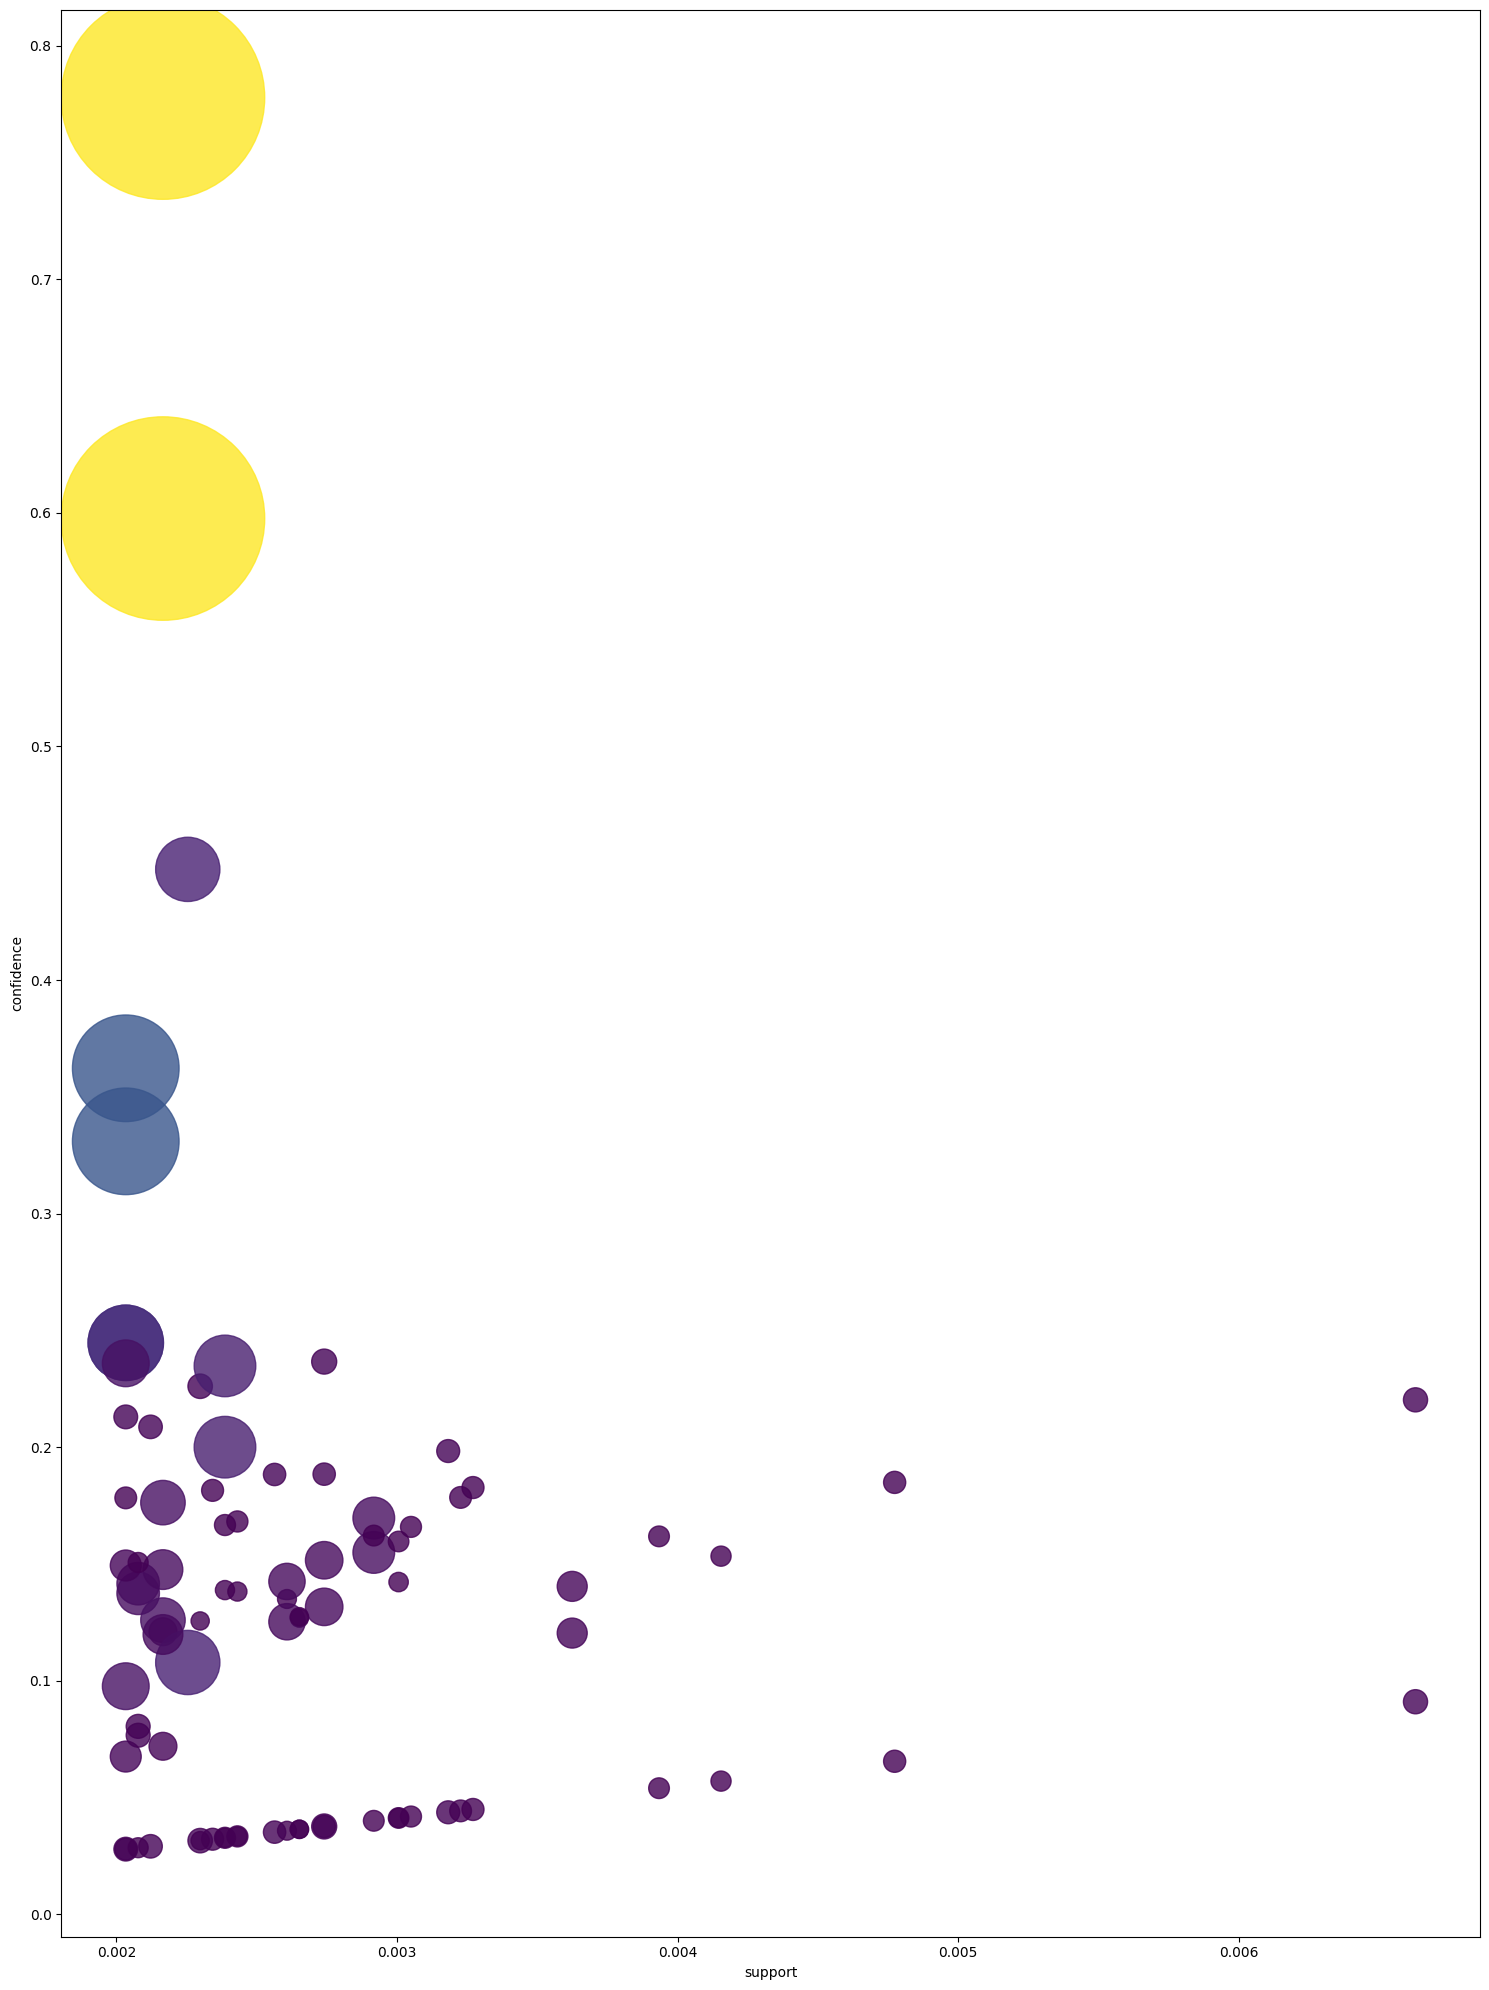

In [22]:
plt.figure(figsize=(15,20))
plt.scatter(support, confidence, s= lift*100,alpha=0.8, c = lift)
plt.xlabel('support')
plt.ylabel('confidence')
plt.tight_layout()
plt.show()

In [23]:
result = df.apply(pd.value_counts).fillna(0)
result

SKU,00GVC,00OK1,0121I,01IEO,01IQT,01L05,01V7M,01XVY,029WA,03C6L,...,ZWNCK,ZWWB5,ZX2UM,ZY9N9,ZYF2U,ZZ2AO,ZZDW7,ZZM1A,ZZNC5,ZZX6K
False,22623,22610,22602,22591,22619,22619,22589,22624,22623,22594,...,22624,22620,22624,22622,22612,22624,22623,22601,22624,22624
True,2,15,23,34,6,6,36,1,2,31,...,1,5,1,3,13,1,2,24,1,1


In [24]:
df_true = result.iloc[1,:]
df_true[:10]

SKU
00GVC     2.0
00OK1    15.0
0121I    23.0
01IEO    34.0
01IQT     6.0
01L05     6.0
01V7M    36.0
01XVY     1.0
029WA     2.0
03C6L    31.0
Name: True, dtype: float64

In [25]:
x = df_true.sort_values(ascending=False)

## 15 Best

In [26]:
products_15_best = x[:15]
products_15_best

SKU
UNJKW    1648.0
COWU2     681.0
OV1P9     613.0
M6J9W     584.0
CZUZX     550.0
E3PAN     478.0
A59HR     473.0
C6TXL     471.0
7GQRJ     437.0
W1ZMG     426.0
DMJ70     416.0
TL4WZ     414.0
EMJ1S     409.0
QGK3S     409.0
M4TM4     407.0
Name: True, dtype: float64

In [27]:
pos = np.arange(len(products_15_best.values))

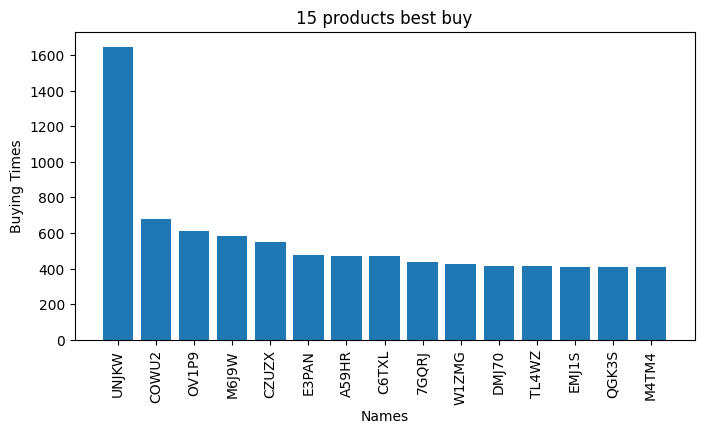

In [28]:
plt.figure(figsize=(8,4))
plt.bar(pos, products_15_best.values, align='center')
plt.xticks(pos, products_15_best.keys(), rotation='vertical')
plt.ylabel('Buying Times')
plt.xlabel('Names')
plt.title('15 products best buy')
plt.show()

## 15 products bot

In [29]:
products_15_bot = x[-15:]
products_15_bot

SKU
FHCRT    1.0
6GM39    0.0
XY1DR    0.0
9DJOL    0.0
LJSFV    0.0
U5KIY    0.0
OSUCY    0.0
D0APX    0.0
XMHTE    0.0
05ZN9    0.0
CO8TB    0.0
Z8IA4    0.0
0FWL7    0.0
XB8QU    0.0
ZEN7K    0.0
Name: True, dtype: float64

In [30]:
pos_bot = np.arange(len(products_15_bot.values))

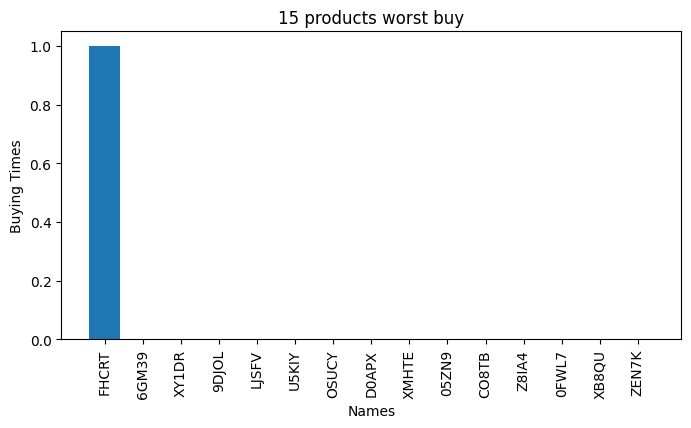

In [31]:
plt.figure(figsize=(8,4))
plt.bar(pos, products_15_bot.values, align='center')
plt.xticks(pos, products_15_bot.keys(), rotation='vertical')
plt.ylabel('Buying Times')
plt.xlabel('Names')
plt.title('15 products worst buy')
plt.show()